<center>
 <img src="https://i.imgur.com/pw8ajPa.png", style="background-color:white;"height=auto, width=auto>
</center>

***

In [139]:
import matplotlib.pyplot as plt
import matplotlib.dates as dates

from io import StringIO
import pandas as pd
import numpy as np
import git

import seaborn as sns
sns.set()


### **set path of cloned repository**

In [140]:
local_repo_path = r'C:\@Development\polkadot'

In [141]:
# Initialize git
repository = git.Repo(local_repo_path)
gitbin = repository.git
gitlog = gitbin.execute('git log --numstat --pretty=format:"\t\t\t%h\t%at\t%aN\t%ae"')

# Prepare data as CSV
commits_rawdata = pd.read_csv(
                    StringIO(gitlog), 
                    sep="\t",
                    header=None,              
                    names=['additions', 'deletions', 'filename', 'sha', 'timestamp', 'author', 'email']
                  )

# Set new columns, datatypes & drop nulls
commits = commits_rawdata.fillna(method='ffill').dropna()
commits['filetype'] = commits['filename'].str.split(pat='.', expand=True)[1]
commits['additions'] = pd.to_numeric(commits['additions'], errors='coerce', downcast='integer')
commits['deletions'] = pd.to_numeric(commits['deletions'], errors='coerce', downcast='integer')
commits['timestamp'] = pd.to_datetime(commits['timestamp'], unit="s")

***

***

### **top users by username/e-mail**

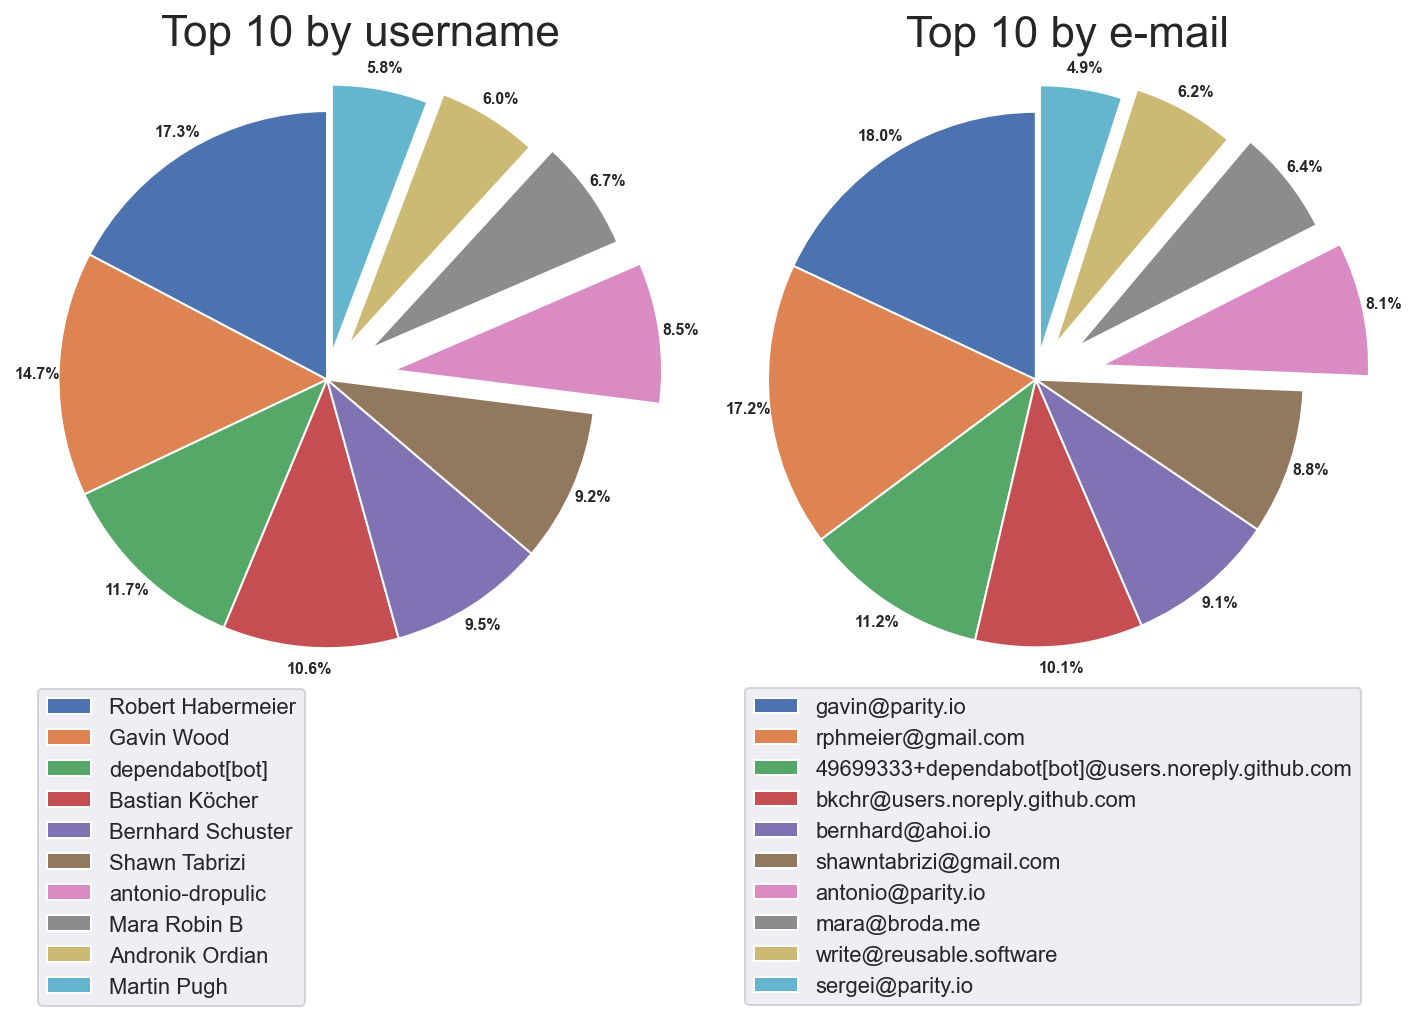

In [142]:
fig = plt.figure(figsize=(10,8),dpi=144, tight_layout=True, frameon=True)
explode=[0, 0, 0, 0, 0, 0, 0.25, 0.2, 0.15, 0.1]
# Top 10 users by username
ax = fig.add_subplot(121)
cts = commits.groupby(['author']).size().reset_index(name='interactions').sort_values(by=['interactions'], ascending=False).head(10)
ax.pie(cts.interactions, autopct='%1.1f%%', startangle=90, textprops={'weight':'bold', 'fontsize':8}, pctdistance=1.08, frame=True, explode=explode)
ax.axis('off')
ax.set_title("Top 10 by username", fontsize=22)
ax.legend(cts.author, loc='upper left', bbox_to_anchor=(0, 0));

# Top 10 users by email
ax = fig.add_subplot(122)
cts = commits.groupby(['email']).size().reset_index(name='interactions').sort_values(by=['interactions'], ascending=False).head(10)

ax.pie(cts.interactions, autopct='%1.1f%%', startangle=90, textprops={'weight':'bold', 'fontsize':8}, pctdistance=1.08, frame=True, explode=explode)
ax.axis('off')
ax.set_title("Top 10 by e-mail", fontsize=22)
ax.legend(cts.email, loc='upper left', bbox_to_anchor=(0, 0));

plt.savefig('contributors-report.png')

***

### **commonly used filetypes**

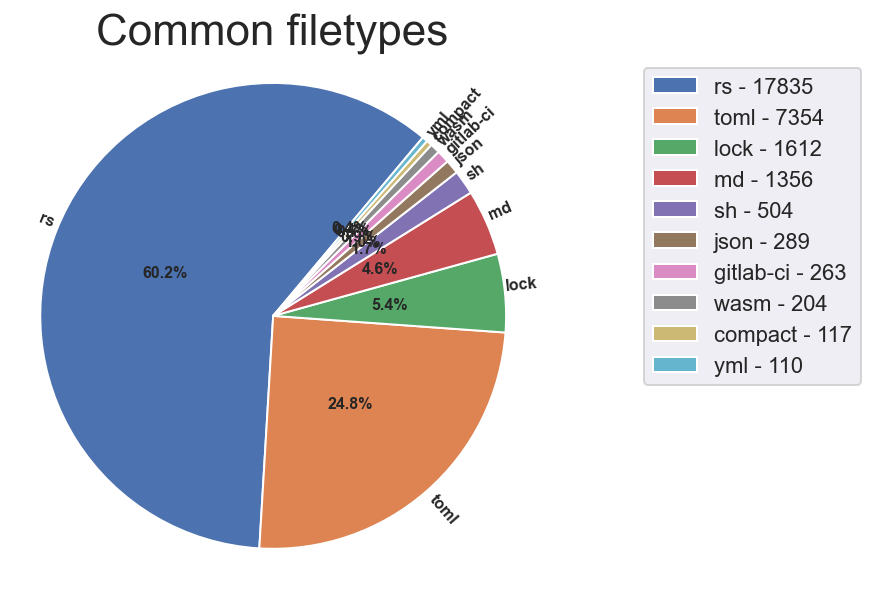

In [143]:
fig = plt.figure(figsize=(10,10), dpi=144, tight_layout=True, frameon=True)

ax = fig.add_subplot(121)
cts = commits.groupby(['filetype']).size().reset_index(name='interactions').sort_values(by=['interactions'], ascending=False).head(10)

ax.pie(cts.interactions, labels=cts.filetype, autopct='%1.1f%%', startangle=50, textprops={'weight':'bold', 'fontsize':8}, pctdistance=0.5, labeldistance=1, frame=True, rotatelabels=True)
ax.axis('off')
ax.set_title("Common filetypes", fontsize=22)
labels = [f'{l} - {v}' for l, v in zip(cts.filetype, cts.interactions)]
ax.legend(labels , loc='upper left', bbox_to_anchor=(1.2, 1));
plt.savefig('filetypes-report.png')

***

### **Activity**

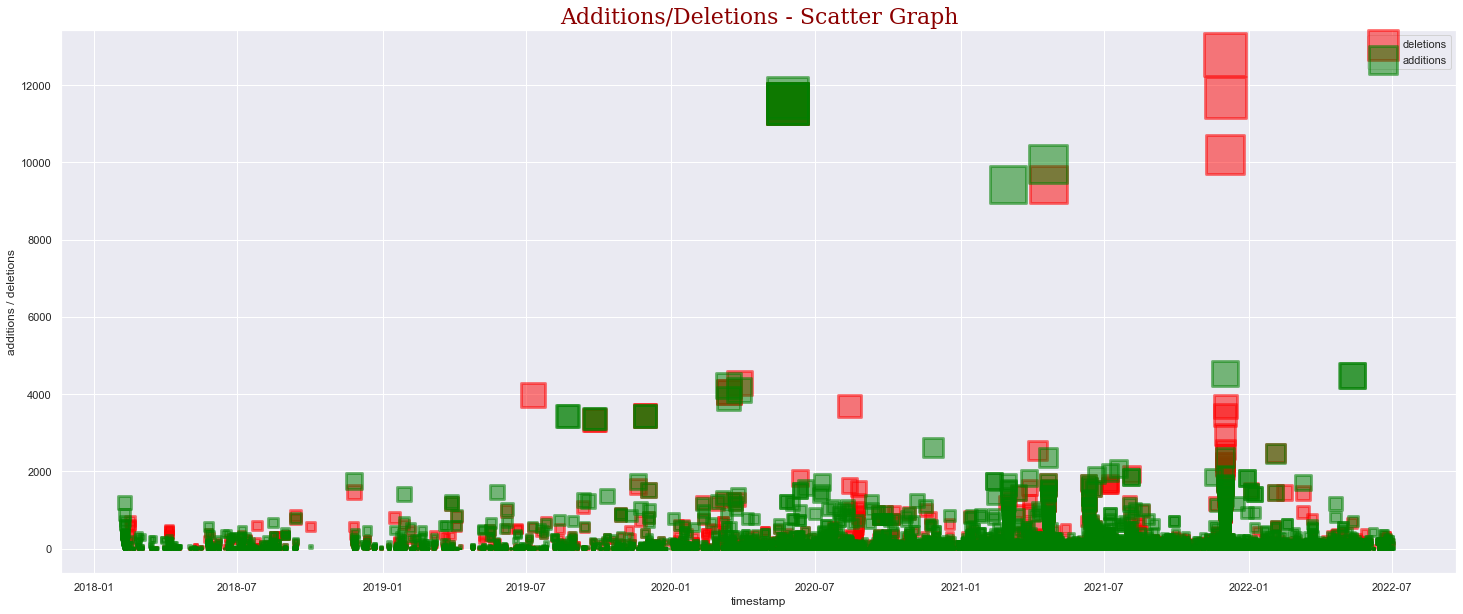

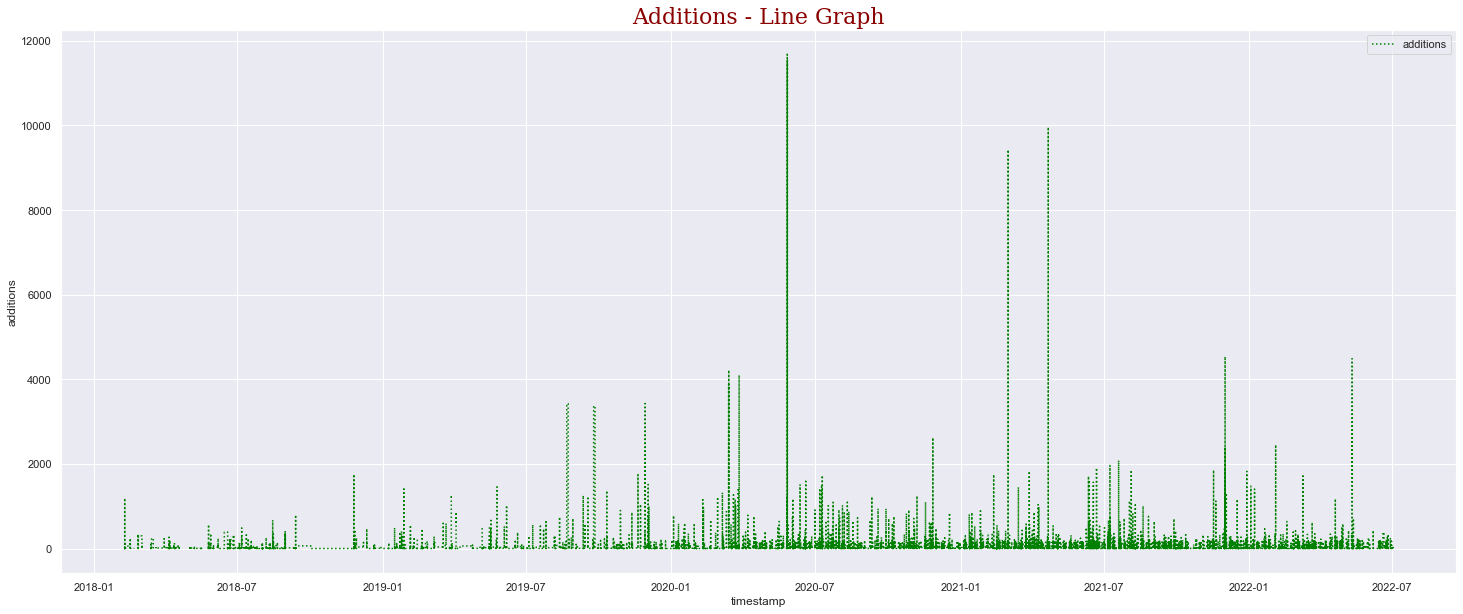

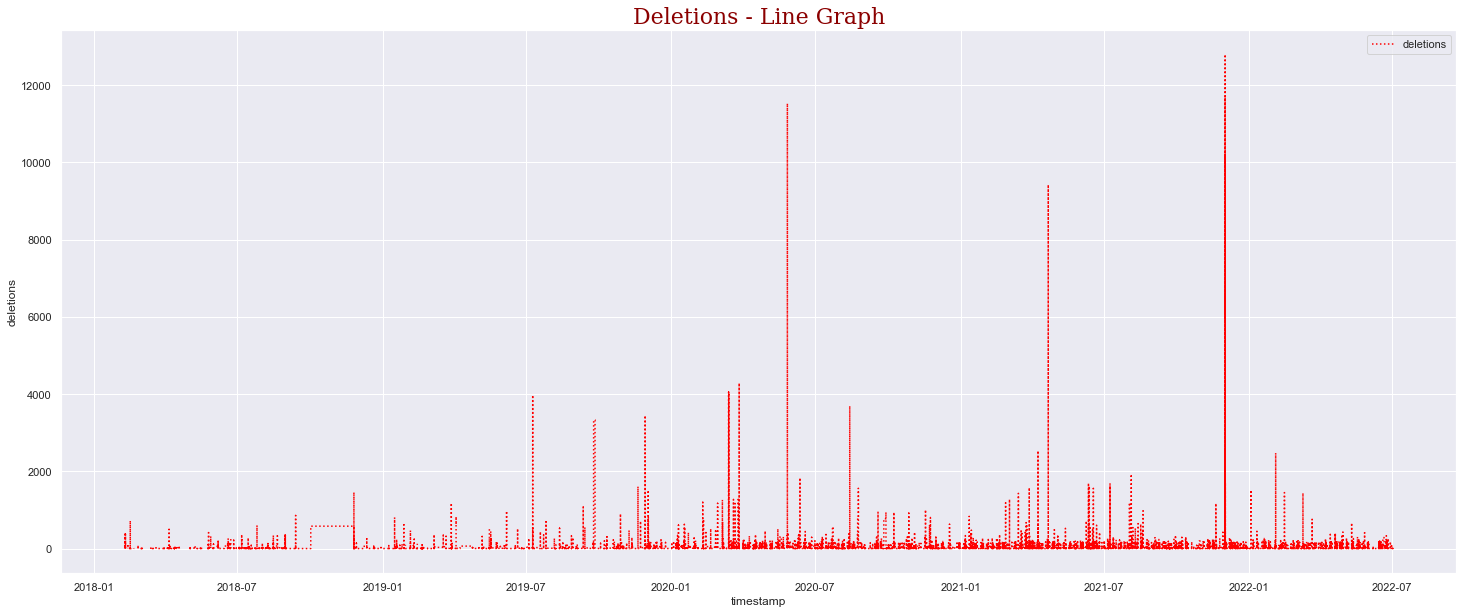

In [144]:
# scatter graph - additions / deletions
%matplotlib inline
plt.figure(figsize=(25, 10))
plt.title('Additions/Deletions - Scatter Graph', fontdict={'family': 'serif', 'color':  'darkred', 'weight': 'normal', 'size': 22})
plt.scatter(commits.timestamp, commits.deletions, marker=',', color="red", alpha=0.5, label='deletions', s=commits.deletions/7, linewidths=3)
plt.scatter(commits.timestamp, commits.additions, marker=',', color="green", alpha=0.5, label='additions', s=commits.additions/7, linewidths=3)
plt.xlabel('timestamp')
plt.ylabel('additions / deletions')
plt.legend()
plt.savefig('additions_deletions - report.png');

# line graph - additions
plt.figure(figsize=(25, 10))
plt.title('Additions - Line Graph', fontdict={'family': 'serif', 'color':  'darkred', 'weight': 'normal', 'size': 22})
plt.plot(commits.timestamp, commits.additions, color='green', linestyle=':')
plt.xlabel('timestamp')
plt.ylabel('additions')
plt.legend(['additions'])
plt.savefig('additions - report.png');


# line graph - deletions
plt.figure(figsize=(25, 10))
plt.title('Deletions - Line Graph', fontdict={'family': 'serif', 'color':  'darkred', 'weight': 'normal', 'size': 22})
plt.plot(commits.timestamp, commits.deletions, color='red', linestyle=':')
plt.xlabel('timestamp')
plt.ylabel('deletions')
plt.legend(['deletions'])
plt.savefig('deletions - report.png');